In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [248]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall

print(f"Version of TensorFlow : {tf.__version__}")

Version of TensorFlow : 2.9.2


In [44]:
data = pd.read_csv('/content/drive/MyDrive/ME781_Project/creditcard.csv')

In [45]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [47]:
print(f"Shape of data : {data.shape}")

Shape of data : (284807, 31)


# Preprocessing

## Checking if is there any instance of duplicated data points and removing them

In [48]:
duplicated_data = data.value_counts()
duplicated_data = duplicated_data.to_frame()
duplicated_data.head()

0
Time     V1         V2        V3        V4       V5        V6        V7         V8         V9        V10       V11       V12       V13       V14       V15       V16       V17       V18       V19       V20       V21        V22       V23       V24       V25       V26       V27       V28       Amount Class    
163152.0 -1.196037  1.585949   2.883976 3.378471  1.511706  3.717077  0.585362  -0.156001   0.122648  4.217934  1.385525 -0.709405 -0.256168 -1.564352  1.693218 -0.785210 -0.228008 -0.412833  0.234834  1.375790 -0.370294   0.524395 -0.355170 -0.869790 -0.133198  0.327804 -0.035702 -0.858197 7.56   0      18
         -1.203617  1.574009   2.889277 3.381404  1.538663  3.698747  0.560211  -0.150911   0.124136  4.220998  1.384569 -0.706897 -0.256274 -1.562583  1.692915 -0.787338 -0.226776 -0.412354  0.234322  1.385597 -0.366727   0.522223 -0.357329 -0.870174 -0.134166  0.327019 -0.042648 -0.855262 1.51   0      18
43153.0  -2.086016  2.203265   1.654339 2.941050 -1.683045  0.529728 -1.352162   1.793449  -0.723686  0.600365 -0.982212 -0.551636 -1.337000  0.834403  1.251862  0.033455  1.067978  0.160510  0.213087  0.079002  0.216444   0.567241 -0.035345  0.370201  0.157378  0.440341  0.210230  0.090558 0.76   0       9
170731.0  2.033492  0.766969  -2.107555 3.631952  1.348594 -0.499907  0.945159  -0.286392  -1.370581  1.653073 -1.600434 -1.510901 -2.143280  1.189850 -0.875588  0.175808 -0.419433 -0.464717 -1.414528 -0.430560  0.241894   0.658545 -0.102644  0.580535  0.643637  0.347240 -0.116618 -0.078601 0.76   0       9
68207.0  -13.192671 12.785971 -9.906650 3.320337 -4.801176  5.760059 -18.750889 -37.353443 -0.391540 -5.052502  4.406806 -4.610756 -1.909488 -9.072711 -0.226074 -6.211557 -6.248145 -3.149247  0.051576 -3.493050  27.202839 -8.887017  5.303607 -0.639435  0.263203 -0.108877  1.269566  0.939407 1.00   1       6

As seen above some data points are duplicated, which may contribute to overfitting. Thus we need to drop them.

In [50]:
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop(['index'], axis=1)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [51]:
print(f"Shape of updated data : {data.shape}")

Shape of updated data : (283726, 31)


We can see the number of datapoints are decreased by nearly 1000 which is even less than 1%.

## Checking NaN values

In [56]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Hurray! No Null values found

## Checking the distribution of the Class and Undersampling

Here,
* Class = 1 --> Fraud Transaction
* Class = 0 --> Legit Transaction

In [61]:
data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

As we can see the data is highly biased towards legit transaction. A simple model predicting legit transaction everytime will give more than 99% accuracy which isn't desirable. Thus we need to undersample the data.

In [63]:
legit_data = data[data['Class'] == 0]
fraud_data = data[data['Class'] == 1]

In [64]:
print(f"Shape of Legit Data : {legit_data.shape}")
print(f"Shape of Fraud Data : {fraud_data.shape}")

Shape of Legit Data : (283253, 31)
Shape of Fraud Data : (473, 31)


Taking random samples from Legit Data same as size of Fraud Data

In [68]:
legit_data_updated = legit_data.sample(n = fraud_data.shape[0])

Concating both datasets

In [81]:
data_updated = pd.concat([legit_data_updated, fraud_data], axis = 0)
data_updated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
56316,47484.0,-6.152836,-2.834160,-0.147653,-3.385492,-0.708124,0.187401,1.512115,-1.726376,3.142138,...,-1.297570,0.602570,0.183528,-0.195044,0.045463,-1.204756,-3.787474,0.903834,169.98,0
55112,46897.0,0.500551,-1.455724,0.791221,0.443739,-1.089977,1.005893,-0.546481,0.439442,0.914659,...,0.048718,-0.270835,-0.126869,-0.216471,-0.165508,0.922755,-0.061758,0.048744,305.49,0
67795,52810.0,-1.176757,0.181026,2.843168,1.865076,-0.270190,0.027453,0.794412,-0.289519,0.180153,...,-0.100843,0.197431,0.337865,0.650580,-0.347611,-0.293911,-0.417546,-0.242385,79.62,0
191235,129463.0,-1.524143,-0.152078,0.673827,-1.588821,2.350725,0.671303,0.906221,0.330432,-0.360938,...,-0.128867,-0.619877,-0.121286,-2.016527,0.725543,0.373645,-0.081897,0.025303,75.17,0
179987,124642.0,1.981756,0.391166,-2.515740,1.278444,1.238632,-0.382826,0.567802,-0.149441,-0.069856,...,-0.007865,0.096579,-0.072161,0.091457,0.495119,-0.513306,-0.010720,-0.034086,26.60,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278813,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
279090,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
279096,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
280081,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


Shuffling the dataset

In [79]:
data_updated = data_updated.sample(frac=1)
data_updated

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
22033,32045.0,-1.273283,0.414035,1.529502,0.971358,-0.205274,1.261790,0.011280,0.733025,-0.574371,...,0.279899,0.396242,-0.023367,-1.318068,0.343866,-0.057672,-0.023968,-0.016221,160.00,0
149297,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1
47884,43494.0,-1.278138,0.716242,-1.143279,0.217805,-1.293890,-1.168952,-2.564182,0.204532,-1.611155,...,0.490183,0.470427,-0.126261,-0.126644,-0.661908,-0.349793,0.454851,0.137843,24.90,1
119312,75581.0,-2.866364,2.346949,-4.053307,3.983359,-3.463186,-1.280953,-4.474764,1.216655,-2.309829,...,1.049732,0.475840,0.404480,0.282030,-0.506901,-0.371741,0.615257,0.803163,124.53,1
166195,118328.0,2.128570,-0.849837,-1.768475,-0.843201,0.089821,0.081679,-0.376377,-0.025411,-0.669354,...,-0.648754,-1.552758,0.297709,-0.419730,-0.384148,0.304090,-0.084159,-0.063575,53.85,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184360,126493.0,-1.876298,2.217981,-1.760913,-0.978376,0.222518,-0.487204,0.171608,0.874324,0.940298,...,-0.480599,-1.026883,0.220148,0.115169,-0.150632,0.127793,0.416862,0.123944,8.99,0
173855,121946.0,1.912282,-0.325246,-1.711076,0.549084,0.019645,-1.392730,0.591462,-0.458006,0.458833,...,0.013668,0.021178,0.005453,0.096431,0.124159,0.550455,-0.117724,-0.062106,95.87,0
247381,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
154123,102671.0,-4.991758,5.213340,-9.111326,8.431986,-3.435516,-1.827565,-7.114303,3.431207,-3.875643,...,1.189423,0.247858,0.294448,-0.548504,-0.174617,0.406703,-0.402339,-0.882886,0.00,1


In [82]:
data_updated['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

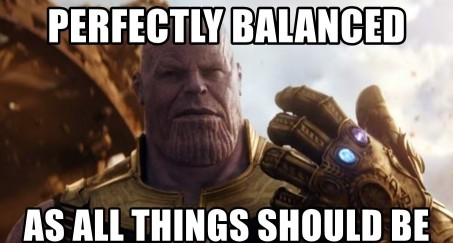

# Splitting the dataset

In [88]:
X = data_updated.iloc[:,:-1]
Y = data_updated.iloc[:,-1]

In [120]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [121]:
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of Y_train : {Y_train.shape}")
print(f"Shape of Y_test : {Y_test.shape}")

Shape of X_train : (756, 30)
Shape of X_test : (190, 30)
Shape of Y_train : (756,)
Shape of Y_test : (190,)


In [337]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [173]:
lr = LogisticRegression(penalty = 'l2')
lr.fit(X_train, Y_train)

LogisticRegression()

In [174]:
Y_lr = lr.predict(X_test)

In [175]:
print(f"Accuracy : {accuracy_score(Y_test, Y_lr)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_lr)}")

Accuracy : 92.10526315789474%
Confusion Matrix : 
 [[89  2]
 [13 86]]


# Decision Tree Classifier

In [158]:
dtc = DecisionTreeClassifier(max_depth = 1000)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1000)

In [159]:
Y_dtc = dtc.predict(X_test)

In [160]:
print(f"Accuracy : {accuracy_score(Y_test, Y_dtc)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_dtc)}")

Accuracy : 91.05263157894737%
Confusion Matrix : 
 [[85  6]
 [11 88]]


# Random Forest Classifier

In [318]:
rfc = RandomForestClassifier(n_estimators = 20, max_depth = 100, )
rfc.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, n_estimators=20)

In [319]:
Y_rfc = rfc.predict(X_test)

In [320]:
print(f"Accuracy : {accuracy_score(Y_test, Y_rfc)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_rfc)}")

Accuracy : 90.52631578947368%
Confusion Matrix : 
 [[87  4]
 [14 85]]


# Neural Network

In [321]:
model = Sequential()
model.add(Input(X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [322]:
model.compile(loss = binary_crossentropy,
              optimizer = SGD(learning_rate = 0.01),
              metrics = [
                  BinaryAccuracy(name='accuracy'),
                  Precision(name='precision'),
                  Recall(name='recall')]
              )

In [323]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 64)                1984      
                                                                 
 dropout_40 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 128)               8320      
                                                                 
 dropout_41 (Dropout)        (None, 128)               0         
                                                                 
 dense_52 (Dense)            (None, 256)               33024     
                                                                 
 dropout_42 (Dropout)        (None, 256)               0         
                                                                 
 dense_53 (Dense)            (None, 16)              

In [324]:
history = model.fit(X_train, Y_train, epochs = 150,  validation_split = 0.25)

Epoch 1/150
18/18 [==============================] - 2s 28ms/step - loss: 0.8502 - accuracy: 0.4868 - precision: 0.4832 - recall: 0.2517 - val_loss: 0.6848 - val_accuracy: 0.6138 - val_precision: 0.6531 - val_recall: 0.3636
Epoch 2/150
18/18 [==============================] - 0s 6ms/step - loss: 0.7444 - accuracy: 0.5503 - precision: 0.5689 - recall: 0.4476 - val_loss: 0.6799 - val_accuracy: 0.5820 - val_precision: 0.5298 - val_recall: 0.9091
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 0.7209 - accuracy: 0.5503 - precision: 0.5589 - recall: 0.5140 - val_loss: 0.6732 - val_accuracy: 0.5767 - val_precision: 0.5247 - val_recall: 0.9659
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.5168 - precision: 0.5199 - recall: 0.5490 - val_loss: 0.6665 - val_accuracy: 0.5820 - val_precision: 0.5283 - val_recall: 0.9545
Epoch 5/150
18/18 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5573 - precis

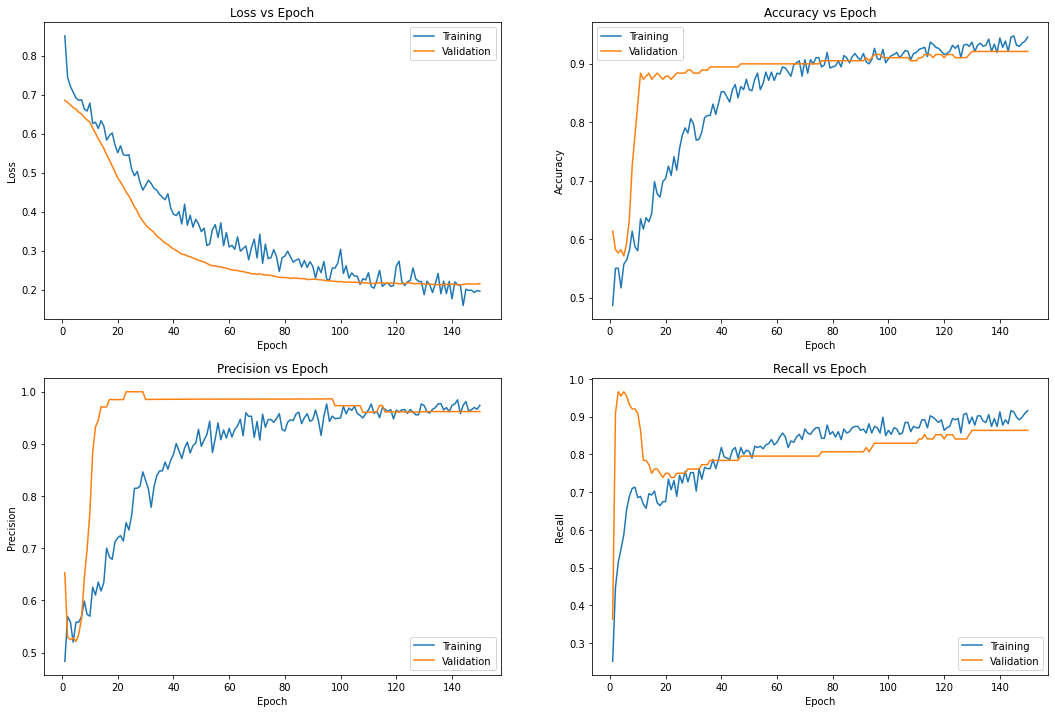

In [325]:
i = np.arange(1, 151)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.set_figheight(12)
fig.set_figwidth(18)

ax1.plot(i, history.history['loss'])
ax1.plot(i, history.history['val_loss'])
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Loss vs Epoch')
ax1.legend(['Training', 'Validation'])

ax2.plot(i, history.history['accuracy'])
ax2.plot(i, history.history['val_accuracy'])
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Accuracy vs Epoch')
ax2.legend(['Training', 'Validation'])

ax3.plot(i, history.history['precision'])
ax3.plot(i, history.history['val_precision'])
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Precision')
ax3.set_title('Precision vs Epoch')
ax3.legend(['Training', 'Validation'])

ax4.plot(i, history.history['recall'])
ax4.plot(i, history.history['val_recall'])
ax4.set_xlabel('Epoch')
ax4.set_ylabel('Recall')
ax4.set_title('Recall vs Epoch')
ax4.legend(['Training', 'Validation'])

plt.show()

In [326]:
Y_nn = model.predict(X_test)
Y_nn = [1 if i > 0.5 else 0 for i in list(Y_nn)]

6/6 [==============================] - 0s 3ms/step


In [327]:
print(f"Accuracy : {accuracy_score(Y_test, Y_nn)*100}%")
print(f"Confusion Matrix : \n {confusion_matrix(Y_test, Y_nn)}")

Accuracy : 92.63157894736842%
Confusion Matrix : 
 [[90  1]
 [13 86]]


# Conclusion
All models work good but Neural Network gives the highest accuracy marginally i.e. 92.63%

In [359]:
print(f"Accuracy by Logistic Regression : {accuracy_score(Y_test, Y_lr)*100}%")
print(f"Accuracy by Decision Tree Classifier : {accuracy_score(Y_test, Y_dtc)*100}%")
print(f"Accuracy by Random Forest Classifier : {accuracy_score(Y_test, Y_rfc)*100}%")
print(f"Accuracy by Neural Network : {accuracy_score(Y_test, Y_nn)*100}%")

Accuracy by Logistic Regression : 92.10526315789474%
Accuracy by Decision Tree Classifier : 91.05263157894737%
Accuracy by Random Forest Classifier : 90.52631578947368%
Accuracy by Neural Network : 92.63157894736842%


In [361]:
print(f"Confusion Matrix for Logistic Regression : \n {confusion_matrix(Y_test, Y_lr)}")
print(f"Confusion Matrix for Decision Tree Classifier : \n {confusion_matrix(Y_test, Y_dtc)}")
print(f"Confusion Matrix for Random Forest Classifier : \n {confusion_matrix(Y_test, Y_rfc)}")
print(f"Confusion Matrix for Neural Network : \n {confusion_matrix(Y_test, Y_nn)}")

Confusion Matrix for Logistic Regression : 
 [[89  2]
 [13 86]]
Confusion Matrix for Decision Tree Classifier : 
 [[85  6]
 [11 88]]
Confusion Matrix for Random Forest Classifier : 
 [[87  4]
 [14 85]]
Confusion Matrix for Neural Network : 
 [[90  1]
 [13 86]]
